# Importing Libraries and Loading Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import style
from sklearn.metrics import mean_squared_error
style.use("dark_background")
import nltk
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import xgboost 

In [3]:
data = pd.read_csv("C:/Users/Animkush/Desktop/Practice/data/BSESN.csv")
data.head()
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-04,26704.019531,26800.060547,26510.310547,26552.919922,26552.919922,8000.0
1,2015-11-05,26557.800781,26557.800781,26243.199219,26304.199219,26304.199219,12300.0
2,2015-11-06,26284.009766,26438.859375,26190.179688,26265.240234,26265.240234,15600.0
3,2015-11-09,25809.000000,26193.169922,25656.900391,26121.400391,26121.400391,13300.0
4,2015-11-10,26094.089844,26094.089844,25709.230469,25743.259766,25743.259766,12800.0
...,...,...,...,...,...,...,...
1227,2020-10-28,40664.351563,40664.351563,39774.601563,39922.460938,39922.460938,29400.0
1228,2020-10-29,39537.171875,40010.828125,39524.250000,39749.851563,39749.851563,19500.0
1229,2020-10-30,39779.820313,39988.250000,39241.871094,39614.070313,39614.070313,12000.0
1230,2020-11-02,39880.378906,39968.031250,39334.921875,39757.578125,39757.578125,15400.0


In [4]:
data["Date"] = pd.to_datetime(data["Date"]) # converting date to DateTIme format
data.dropna(inplace=True)

Text(0, 0.5, 'Close')

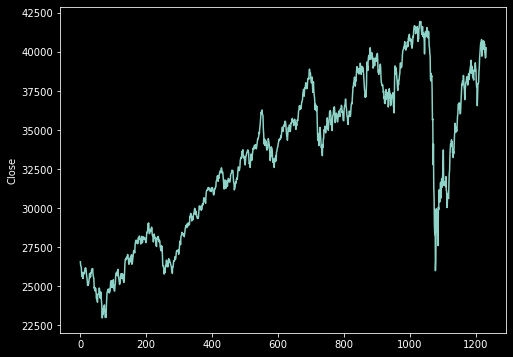

In [5]:
plt.figure(figsize=(8, 6))
data["Close"].plot()
plt.ylabel("Close")

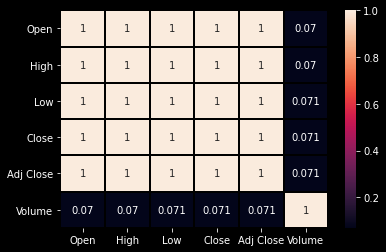

In [6]:
sb.heatmap(data.corr(), annot=True, linewidth=1, linecolor="black") # checking if thewre any correlation between any features.

# Using Auto Arima Library for Stock Prediction.

In [ ]:
from pmdarima import auto_arima

train = data[:1000]
test = data[1000:]

training = train["Close"]
testing = valid["Close"]

model = auto_arima(training, trace = True, error_action = 'ignore', suppress_warnings = True)

model.fit(training)

# Predicting The stocks

In [8]:
forecast = model.predict(n_periods=len(testing))
forecast = pd.DataFrame(forecast, index=test.index, columns=["Prediction"])

In [9]:
rms = np.sqrt(mean_squared_error(testing, forecast))
rms

6926.575652821915

Root Mean Squared is 6926.575

Text(0.5, 0, 'Time')

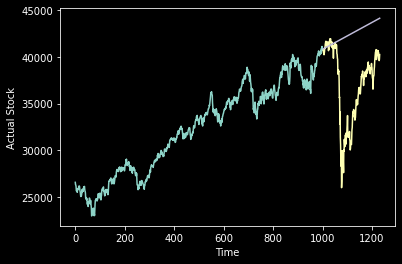

In [10]:
plt.plot(train['Close'])
plt.plot(test['Close'])
plt.plot(forecast['Prediction'])
plt.ylabel("Actual Stock")
plt.xlabel("Time")

# Analyzing the News Data

In [11]:
col  = ["Date", "Category", "News"]
news_data =  pd.read_csv("C:/Users/Animkush/Desktop/Practice/Data/indiannews.csv", names=col)
news_data = news_data[2218550:]

C:\Users\Animkush\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
news_data.drop(["Category"], axis=1, inplace=True)
news_data

,Date,News
2218550,20151104,Rules for dating a non-vegetarian
2218551,20151104,Top 15 diabetic diet tips for Indians
2218552,20151104,Why do men want sex in the morning?
2218553,20151104,7 exercises that can cause trouble!
2218554,20151104,Ram Slam T20 Challenge: Dolphins vs Lions
...,...,...
3297168,20200630,why tiktok removed 1 65 crore videos in india
3297169,20200630,apurva asrani calls alia bhatts mother soni ra...
3297170,20200630,kangana ranaut gets a doll version of herself ...
3297171,20200630,meezaan jaffrey reminisces his childhood days ...


In [13]:
news_data.info()
news_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078623 entries, 2218550 to 3297172
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   Date    1078623 non-null  object
 1   News    1078623 non-null  object
dtypes: object(2)
memory usage: 16.5+ MB


,Date,News
2218550,20151104,Rules for dating a non-vegetarian
2218551,20151104,Top 15 diabetic diet tips for Indians
2218552,20151104,Why do men want sex in the morning?
2218553,20151104,7 exercises that can cause trouble!
2218554,20151104,Ram Slam T20 Challenge: Dolphins vs Lions
...,...,...
3297168,20200630,why tiktok removed 1 65 crore videos in india
3297169,20200630,apurva asrani calls alia bhatts mother soni ra...
3297170,20200630,kangana ranaut gets a doll version of herself ...
3297171,20200630,meezaan jaffrey reminisces his childhood days ...


In [14]:
news_data["Date"] = pd.to_datetime(news_data["Date"], format="%Y%m%d") #converting to Date Time Format
news_data

,Date,News
2218550,2015-11-04,Rules for dating a non-vegetarian
2218551,2015-11-04,Top 15 diabetic diet tips for Indians
2218552,2015-11-04,Why do men want sex in the morning?
2218553,2015-11-04,7 exercises that can cause trouble!
2218554,2015-11-04,Ram Slam T20 Challenge: Dolphins vs Lions
...,...,...
3297168,2020-06-30,why tiktok removed 1 65 crore videos in india
3297169,2020-06-30,apurva asrani calls alia bhatts mother soni ra...
3297170,2020-06-30,kangana ranaut gets a doll version of herself ...
3297171,2020-06-30,meezaan jaffrey reminisces his childhood days ...


Joining all the news together Date wise

In [15]:
news_data["News"] = news_data.groupby(["Date"]).transform(lambda x : ' '.join(x)) 
news_data = news_data.drop_duplicates() 
news_data.reset_index(inplace = True, drop = True)
news_data

,Date,News
0,2015-11-04,Rules for dating a non-vegetarian Top 15 diabe...
1,2015-11-05,Easy Gajar ka Halwa recipe Five festive hair i...
2,2015-11-06,10 ways to make your life more romantic Brilli...
3,2015-11-07,Most common food allergies you must know Reaso...
4,2015-11-08,10 things women simply love to hear Top 10 myt...
...,...,...
1696,2020-06-26,Containment zone residents slam high prices ch...
1697,2020-06-27,like me i wont let you have a toxic relationsh...
1698,2020-06-28,Atanu Ghosh plans to rewrite old scripts to ma...
1699,2020-06-29,6 hot and stylish bikini looks of Katrina Kaif...


# Using textblob to find Polarity and Subjectivity in News

In [16]:
#import nltk
#nltk.download('punkt')
from textblob import TextBlob

def getSub(news):
    return TextBlob(news).sentiment.subjectivity

def getPol(news):
    return TextBlob(news).sentiment.polarity

news_data["Subjectivity"] = news_data["News"].apply(getSub)
news_data["Polarity"] = news_data["News"].apply(getPol)

C:\Users\Animkush\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Animkush\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [17]:
news_data

,Date,News,Subjectivity,Polarity
0,2015-11-04,Rules for dating a non-vegetarian Top 15 diabe...,0.414051,0.079806
1,2015-11-05,Easy Gajar ka Halwa recipe Five festive hair i...,0.407633,0.080671
2,2015-11-06,10 ways to make your life more romantic Brilli...,0.437292,0.068145
3,2015-11-07,Most common food allergies you must know Reaso...,0.426250,0.089414
4,2015-11-08,10 things women simply love to hear Top 10 myt...,0.434014,0.114884
...,...,...,...,...
1696,2020-06-26,Containment zone residents slam high prices ch...,0.381841,0.068333
1697,2020-06-27,like me i wont let you have a toxic relationsh...,0.398808,0.079290
1698,2020-06-28,Atanu Ghosh plans to rewrite old scripts to ma...,0.402636,0.057636
1699,2020-06-29,6 hot and stylish bikini looks of Katrina Kaif...,0.396828,0.061956


(array([  7.,  37., 136., 337., 443., 391., 226.,  95.,  19.,  10.]),
 array([0.33258472, 0.34656618, 0.36054765, 0.37452911, 0.38851057,
        0.40249203, 0.4164735 , 0.43045496, 0.44443642, 0.45841788,
        0.47239935]),
 <a list of 10 Patch objects>)

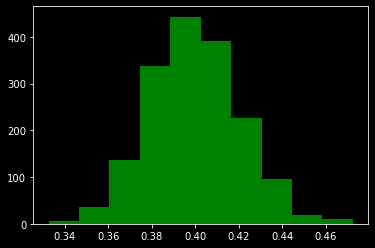

In [18]:
plt.hist(news_data["Subjectivity"], color="Green")

(array([ 10.,  78., 242., 454., 465., 307., 104.,  32.,   7.,   2.]),
 array([-0.01008314,  0.00685161,  0.02378636,  0.04072111,  0.05765586,
         0.07459061,  0.09152535,  0.1084601 ,  0.12539485,  0.1423296 ,
         0.15926435]),
 <a list of 10 Patch objects>)

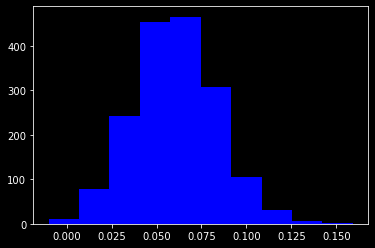

In [19]:
plt.hist(news_data["Polarity"], color="Blue")

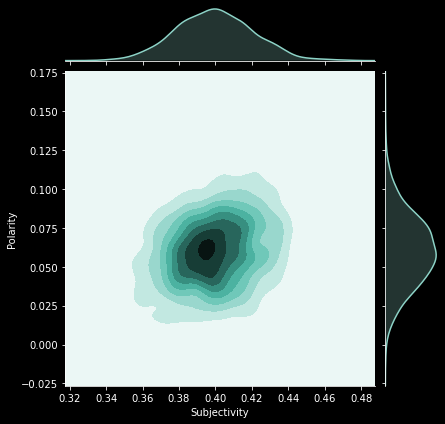

In [20]:
sb.jointplot(x ="Subjectivity", y="Polarity", data=news_data, kind="kde")

Further finding a positive and negative news from all news data.

In [21]:
sia = SentimentIntensityAnalyzer()

news_data["Negative"] = [sia.polarity_scores(v)["neg"] for v in news_data["News"]]
news_data["Positive"] = [sia.polarity_scores(v)["pos"] for v in news_data["News"]]


C:\Users\Animkush\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Animkush\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


# Merging Both

In [22]:
merge = pd.merge(data, news_data, how="inner", on="Date")

In [23]:
fdata = merge[["Close", "Subjectivity", "Polarity", "Negative", "Positive"]]

In [24]:
fdata

,Close,Subjectivity,Polarity,Negative,Positive
0,26552.919922,0.414051,0.079806,0.144,0.109
1,26304.199219,0.407633,0.080671,0.130,0.115
2,26265.240234,0.437292,0.068145,0.139,0.109
3,26121.400391,0.440146,0.103648,0.138,0.131
4,25743.259766,0.425240,0.084667,0.126,0.128
...,...,...,...,...,...
1134,34868.980469,0.387802,0.088329,0.136,0.078
1135,34842.101563,0.403998,0.027038,0.142,0.064
1136,35171.269531,0.381841,0.068333,0.163,0.089
1137,34961.519531,0.396828,0.061956,0.144,0.086


In [25]:
sc = MinMaxScaler()
newdata = pd.DataFrame(sc.fit_transform(fdata))
newdata.columns = fdata.columns
newdata.index = fdata.index
newdata

,Close,Subjectivity,Polarity,Negative,Positive
0,0.189523,0.582671,0.641650,0.452381,0.658824
1,0.176433,0.536772,0.647826,0.341270,0.729412
2,0.174383,0.748902,0.558415,0.412698,0.658824
3,0.166812,0.769315,0.811844,0.404762,0.917647
4,0.146911,0.662699,0.676350,0.309524,0.882353
...,...,...,...,...,...
1134,0.627192,0.394929,0.702493,0.388889,0.294118
1135,0.625777,0.510774,0.264982,0.436508,0.129412
1136,0.643101,0.352298,0.559758,0.603175,0.423529
1137,0.632062,0.459491,0.514237,0.452381,0.388235


# Hybrid Model for Predicting Close Stock value using news Sentiment.

In [29]:
X = newdata.drop("Close", axis=1)
y = newdata["Close"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Using RandomForest

In [30]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

In [34]:
print("RMSE RandomForest", mean_squared_error(y_test, pred))

RMSE 0.05457312663510177


# Using XGboost

In [36]:
xgb = xgboost.XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [38]:
predxgb = xgb.predict(X_test)
print("RMSE XGB", mean_squared_error(y_test, predxgb))

RMSE XGB 0.06427802517648049
